Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = Steven Tey
COLLABORATORS = ""


# CS110 Fall 2019 - Assignment 1
# Divide and Conquer Sorting Algorithms

This assignment focuses on the implementation of sorting algorithms and analyzing their performance both mathematically (using theoretical arguments on the asymptotic behavior of algorithms ) and experimentally (i.e., running experiments for different input arrays and plotting relevant performance results). 

Every CS110 assignment begins with a check-up on your class responsibilities and professional standing, as well as your ability to address one of the course LOs #ComputationalSolutions. Thus to complete the first part of this assignment, you will need to take a screenshot of your CS110 dashboard on Forum where the following is visible:
your name.
your absences for the course have been set to excused up to session 2.2 (inclusively).
This will be evidence that you have submitted acceptable pre-class and make-up work for a CS110 session you may have missed. Check the specific CS110 make-up and pre-class policies in the syllabus of the course.


**NOTES:**

1. Your assignment submission needs to include the following resources:
    * A PDF file must be the first resource. This file must be generated from the template notebook where you have written all of the answers (check this link for instructions on how to do this). Make sure that the PDF displays properly (all text and code can be seen within the paper margins).
    * Make sure that you submit a neat, clearly presented, and easy-to-read PDF. Please make sure to include page numbers
    * Your second resource must be the template notebook you have downloaded from the gist provided and where you included your answers. Submit this file directly following the directions in this picture:

![upload](upload.png)


2. Questions (1)-(7) will be graded on the indicated LOs, please make sure to consult their descriptions and rubrics in the course syllabus. You will not be penalized for not attempting the optional challenge.

3. After completing the assignment, evaluate the application of the HCs you have identified prior to and while you were working on this assignment and footnote them (refer to [these guidelines](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit) on how to incorporate HCs in your work). 
Here are some examples of weak applications of some of the relevant HCs:

    * Example 1: “#algorithms: I wrote an implementation of the Bubble sort”. 
        * This is an extremely superficial use of the HC in a course on Algorithms, and your reference will be graded accordingly. Instead, consider what constitutes an algorithm (see Cormen et al, sections 1.1 and 1.2). Once you have a good definition of an algorithm, think of how this notion helped you approach the implementation of the algorithm, analyze its complexity and understand why it’s important to write an optimal python implementation of the algorithm.
    * Example 2: “#dataviz: I plotted nice curves showing the execution time of bubble sort, or I plotted beautiful curves with different colors and labels.”
        * Again, these two examples are very superficial uses of the HC #dataviz. Instead consider writing down how do the plots and figures helped you interpret, analyze and write concluding remarks from your experiments. Or write about any insight you included in your work that came from being able to visualize the curves.
    * Example 3: “#professionalism: I wrote a nice paper/article that follows all the directions in this assignment.” 
        * By now, you should realize that this is a poor application of the HC #professionalism. Instead, comment on how you actively considered the HC while deciding on the format, length, and style for writing your report.

4. Your code will be tested for similarity using Turnitin, both to other students’ work and examples available online. As such, be sure to cite all references that you used in devising your solution. Any plagiarism attempts will be referred to the ASC.


** Complete the following tasks which will be graded in the designated LOs and foregrounded HCs:**

## Question 1. [HCs #responsibility and #professionalism; #ComputationalSolutions]

Submit a PDF file with a screenshot of your CS110 dashboard with the information described above.



![alf](ALF.png)

## Question 2. [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

Write a Python 3 implementation of the three-way merge sort discussed in class using the code skeleton below. You should also provide at least three test cases (possibly edge cases) that demonstrate the correctness of your code. Your output must be a sorted **Python list**.

In [1]:
import time
import random
import math as m
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c_three_way = [] # Counter to measure number of steps taken by the three-way merge sort

def threeWayMerge(lst):
    """Implements three-way marge sort
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    
    Output: a sorted Python list"""
    if len(lst) >1: 
        a_third = len(lst)//3 # First splitting point of the array (one-third of the length)
        c_three_way.append(1)
        two_thirds = ((len(lst)//3)*2)+1 # Second splitting point of the array (two-thirds of the length)
        c_three_way.append(1)            # Here, we added a +1 to account for cases where the remainder is 2.
        L = lst[:a_third] # Left split 
        c_three_way.append(1)
        M = lst[a_third:two_thirds] # Middle split  
        c_three_way.append(1)
        R = lst[two_thirds:] # Right split 
        c_three_way.append(1)
        
        # Time for some recurrence!
        
        threeWayMerge(L) # Applying the threeWayMerge algorithm on the left split  
        threeWayMerge(M) # Applying the threeWayMerge algorithm on the middle split  
        threeWayMerge(R) # Applying the threeWayMerge algorithm on the right split 

        i = j = k = x = 0
        
        # In the case where all 3 splits have remaining values
        # Here, we are trying to find the smallest value out of the 3 elements that we are comparing
        while i < len(L) and j < len(M) and k < len(R): 
            if L[i] < M[j]: 
                if L[i] < R[k]:
                    lst[x] = L[i] 
                    i += 1
                else: 
                    lst[x] = R[k] 
                    k += 1
            else:
                if M[j] < R[k]: 
                    lst[x] = M[j] 
                    j += 1
                else:
                    lst[x] = R[k] 
                    k += 1
            x+=1
            c_three_way.append(1)
            
        # In the case where the left and middle split have remaining values
        # Similar to earlier, we are also trying to find the smaller value out of the two
        while i < len(L) and j < len(M): 
            if L[i] < M[j]: 
                lst[x] = L[i] 
                i += 1
            else:
                lst[x] = M[j]
                j += 1
            x+=1
            c_three_way.append(1)
            
        # In the case where the left and right split have remaining values
        while i < len(L) and k < len(R): 
            if L[i] < R[k]: 
                lst[x] = L[i] 
                i += 1
            else:
                lst[x] = R[k]
                k += 1
            x+=1
            c_three_way.append(1)

        # In the case where the middle and right split have remaining values
        while j < len(M) and k < len(R): 
            if M[j] < R[k]: 
                lst[x] = M[j] 
                j += 1
            else:
                lst[x] = R[k]
                k += 1
            x+=1
            c_three_way.append(1)
            
        # In the case where the left split still has remaining values
        # Here, we just take this value since it's the only one left.
        while i < len(L): 
            lst[x] = L[i] 
            i+=1
            x+=1
            c_three_way.append(1)
        
        # In the case where the middle split still has remaining values
        while j < len(M): 
            lst[x] = M[j] 
            j+=1
            x+=1
            c_three_way.append(1)

        # In the case where the right split still has remaining values
        while k < len(R): 
            lst[x] = R[k] 
            k+=1
            x+=1
            c_three_way.append(1)

    return lst

A = [2, 6, -1, 11, 4, 13, 5, 0, -2]
print(f"Given list was {A}, sorted list was {threeWayMerge(A)}.")
print(len(c_three_way))

Given list was [2, 6, -1, 11, 4, 13, 5, 0, -2], sorted list was [-2, -1, 0, 2, 4, 5, 6, 11, 13].
52


In [3]:
# First example: Simple list where the number of elements is a multiple of 3 and has no repeating elements.
A = [2, 6, -1, 11, 4, 13, 5, 0, -2]
print(f"Given list was {A}, sorted list was {threeWayMerge(A)}.")

# Second example: List where the number of elements is NOT a multiple of 3 and has repeating elements.
B = [2, 6, 9, 12, 11, 13, 5, 6, 7, 10, 22, 2]
print(f"Given list was {B}, sorted list was {threeWayMerge(B)}.")

# Third example: Complex list where 10 elements are selected randomly between -100 and 100.
C = random.sample(range(-100, 100), 10)
print(f"Given list was {C}, sorted list was {threeWayMerge(C)}.")

Given list was [2, 6, -1, 11, 4, 13, 5, 0, -2], sorted list was [-2, -1, 0, 2, 4, 5, 6, 11, 13].
Given list was [2, 6, 9, 12, 11, 13, 5, 6, 7, 10, 22, 2], sorted list was [2, 2, 5, 6, 6, 7, 9, 10, 11, 12, 13, 22].
Given list was [-17, -25, 12, 96, 85, 28, -6, 37, -56, -48], sorted list was [-56, -48, -25, -17, -6, 12, 28, 37, 85, 96].


In [4]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 3.  [(#SortingAlgorithms, #PythonProgramming, #CodeReadability, #ComputationalCritique] 

Implement a second version of a three-way merge sort that calls selection sort when sublists are below a certain length (of your choice) rather than continuing the subdivision process. Justify what might be an appropriate threshold for the input array for applying selection sort.

In [5]:
c_three_way_ex = []

def selectionSort(A):
    for i in range(len(A)): 
        c_three_way_ex.append(1)
        lowest_index = i 
        for j in range(i+1, len(A)): # searches the list to find the smallest element
            c_three_way_ex.append(1)
            if A[lowest_index] > A[j]: 
                lowest_index = j  
                c_three_way_ex.append(1)
        A[i], A[lowest_index] = A[lowest_index], A[i]  # Swap the minimum element with the first element  
        c_three_way_ex.append(1)
 
    return(A)

def extendedThreeWayMerge(lst):
    """Implements the second version of a three-way merge sort
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    
    Output: a sorted Python list"""
    
    if len(lst) >1: 
        a_third = len(lst)//3
        c_three_way_ex.append(1)
        two_thirds = ((len(lst)//3)*2)+1
        c_three_way_ex.append(1)
        L = lst[:a_third]
        c_three_way_ex.append(1)
        M = lst[a_third:two_thirds]
        c_three_way_ex.append(1)
        R = lst[two_thirds:]    
        c_three_way_ex.append(1)
        
     # Here, I tried splitting the list all the way down to sublists of length 3 and above before using 
     # selection sort.
    
     # if len(L) > 3 and len(M) > 3 and len(R) > 3:
     #     extendedThreeWayMerge(L) 
     #     extendedThreeWayMerge(M) 
     #     extendedThreeWayMerge(R)
    
     # However, the average time for 10 trial runs for this method to sort 10,000 random samples
     # turned out to be 66%  longer than if I did it with use one three way split (2.5s vs 1.5s)
     # Therefore, I decided to stick with this instead. 
     # Nonetheless, this is still much longer than the original 3-way merge sort method, since 
     # selection sort is much more time consuming than a divide-and-conquer algorithm.
         
        selectionSort(L)
        selectionSort(M)
        selectionSort(R)
    
        # Here, we still have to run the merge procedures to recombine the (sorted) split lists.
        
        i = j = k = x = 0

        while i < len(L) and j < len(M) and k < len(R): 
            if L[i] < M[j]: 
                if L[i] < R[k]:
                    lst[x] = L[i] 
                    i += 1
                else: 
                    lst[x] = R[k] 
                    k += 1
            else:
                if M[j] < R[k]: 
                    lst[x] = M[j] 
                    j += 1
                else:
                    lst[x] = R[k] 
                    k += 1
            x+=1
            c_three_way_ex.append(1)

        while i < len(L) and j < len(M): 
            if L[i] < M[j]: 
                lst[x] = L[i] 
                i += 1
            else:
                lst[x] = M[j]
                j += 1
            x+=1
            c_three_way_ex.append(1)
            
        while i < len(L) and k < len(R): 
            if L[i] < R[k]: 
                lst[x] = L[i] 
                i += 1
            else:
                lst[x] = R[k]
                k += 1
            x+=1
            c_three_way_ex.append(1)

        while j < len(M) and k < len(R): 
            if M[j] < R[k]: 
                lst[x] = M[j] 
                j += 1
            else:
                lst[x] = R[k]
                k += 1
            x+=1
            c_three_way_ex.append(1)
            
        while i < len(L): 
            lst[x] = L[i] 
            i+=1
            x+=1
            c_three_way_ex.append(1)
        
        while j < len(M): 
            lst[x] = M[j] 
            j+=1
            x+=1
            c_three_way_ex.append(1)

        while k < len(R): 
            lst[x] = R[k] 
            k+=1
            x+=1
            c_three_way_ex.append(1)
        
    return lst

# Code I used to measure the time complexity of the two methods explained earlier
timediff_selection = []

for _ in range(10):
    E = random.sample(range(100000), 10000)
    start = time.time()                     #starts counting time.
    extendedThreeWayMerge(E)                #sorts list.
    end = time.time()                       #stops counting time.
    timediff_selection.append(end-start)    #time difference

print(np.mean(timediff_selection))

3.259837603569031


In [6]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 4 [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

Bucket sort (or Bin sort) is an algorithm that takes as inputs an $n$-element array and the number of buckets, $k$, to be used during sorting.  Then, the algorithm distributes the elements of the input array into $k$-different buckets and proceeds to sort the individual buckets. Then, merges the sorted buckets to obtained the sorted array. Here is pseudocode for the BucketSort algorithm:

![bucket](bucket.png)

The BucketSort above calls the function **GetBucketNum** (see the pseudocode below) to distribute all the elements of array $A$ into $k$-buckets.  Every element in the array is assigned a bucket number based on its value (positive or negative numbers). **GetBucketNum** returns the bucket number that corresponds to element $A[i]$.   It takes as inputs the element of the array, $A[i]$, the max and min elements in $A$, the size of the intervals in every bucket (e.g., if you have numbers with values between 0 and 100 numbers and 5 buckets, every bucket has an interval of size $20 = [100-0]/5$).  Notice that in pseudocode the indices of the arrays are from 1 to $n$. Thus, GetBucketNum consistently returns a number between 1 and $n$ (make sure you account for this in your Python program).

![bucketnum](getbucketnum.png)

Write a Python 3 implementation of BucketSort that uses the selection sort algorithm for sorting the individual buckets in line 10 of the algorithm.

In [7]:
c_bucket = []

def selectionSortBucket(A):
    for i in range(len(A)): 
        c_bucket.append(1)
        lowest_index = i 
        for j in range(i+1, len(A)): # searches the list to find the smallest element
            c_bucket.append(1)
            if A[lowest_index] > A[j]: 
                lowest_index = j  
                c_bucket.append(1)
        A[i], A[lowest_index] = A[lowest_index], A[i]  # Swap the minimum element with the first element  
        c_bucket.append(1)
 
    return(A)

def getBucketNum(a, mn, mx, sz, k):
    if a == mx: # When the element is the largest element, it'll go in the final bucket (bucket number = k)
        j = k
    elif a == mn: # When the element is the smallest element, it'll go in the first bucket (bucket number = 1)
        j = 1
    else:
        j = 1
        while a > mn + (sz*j): # Assigning the elements their respective bucket numbers according to their 
            j += 1             # position within the list relative to the bucket sizes.
    return j
    c_bucket.append(1)

def bucketSort(lst, k):
    """Implements BucketSort
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    k: int, length of lst
    
    Output: a sorted Python list"""
    mn = min(lst) # Finding the smallest element in the list
    c_bucket.append(1)
    mx = max(lst) # Finding the largest element in the list
    c_bucket.append(1)
    sz = m.ceil((mx-mn)/k) # Determining the bucket size by dividing the range of values into k intervals
    c_bucket.append(1)
    
    buckets = [[] for _ in range(k)]
    for i in range(len(lst)):
        c_bucket.append(1)
        b = getBucketNum(lst[i], mn, mx, sz, k) - 1 # Here, we have to -1 because of the way the GetBucketNum
                                                    # pseudocode is written - it always returns a number between
                                                    # 1 and  𝑛.
        buckets[b].append(lst[i]) # Append the number to its respective bucket.
        c_bucket.append(1)
    for i in range(k):
        c_bucket.append(1)
        selectionSortBucket(buckets[i]) # Use selection sort to sort the values in the buckets. 
        c_bucket.append(1)
    
    lst = list(np.hstack(buckets)) # Since the buckets are already sorted, we just have to stack them together 
    c_bucket.append(1)             # to get the final sorted list.
    
    return lst

In [8]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 5 [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

 Implement a second version of the BucketSort algorithm. This time in line 10 of BucketSort use the Bucket sort recursively until the size of the bucket is less than or equal to k, the base case for the recursion.



In [9]:
c_recursive_bucket = []

def extendedBucketSort(lst, k):
    """Implements the second version of the BucketSort algorithm
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    k: int, length of lst
    
    Output: a sorted Python list"""
    mn = min(lst) 
    c_recursive_bucket.append(1)
    mx = max(lst) 
    c_recursive_bucket.append(1)
    sz = m.ceil((mx-mn)/k) 
    c_recursive_bucket.append(1)
    
    buckets = [[] for _ in range(k)]
    for i in range(len(lst)):
        c_recursive_bucket.append(1)
        b = getBucketNum(lst[i], mn, mx, sz, k) - 1
        buckets[b].append(lst[i]) 
        c_recursive_bucket.append(1)
    for i in range(k):
        c_recursive_bucket.append(1)
        if len(buckets[i]) > k:
            extendedBucketSort(buckets[i], k)
            c_recursive_bucket.append(1)
            selectionSortBucket(buckets[i])
            c_recursive_bucket.append(1)
        else:
            selectionSortBucket(buckets[i])
            c_recursive_bucket.append(1)
        lst = list(np.hstack(buckets)) 
        c_recursive_bucket.append(1)
    
    return lst

# B = [2, 6, 9, 12, 11, 13, 5, 6, 7, 10, 22, 2]
# print(f"Given list was {B}, sorted list was {extendedBucketSort(B, 3)}.")

In [10]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 6 [#ComplexityAnalysis, #ComputationalCritique] 

Analyze and compare the practical run times of regular merge sort (i.e., two-way merge sort), three-way merge sort, and the extended merge sort from (3) by producing a plot that illustrates how every running time and number of steps grows with input size. Make sure to:
1. define what each algorithm's complexity is
2. enumerate the explicit assumptions made to assess each run time of the algorithm's run time.
3. and compare your benchmarks with the theoretical result we have discussed in class.


In [11]:
# Function for a two-way merge sort

c_two_way = []

def twoWayMerge(lst): 
    if len(lst) >1: 
        half = len(lst)//2 #Finding the halfway point of the array 
        c_two_way.append(1)
        L = lst[:half] # Dividing the array elements into two halves 
        c_two_way.append(1)
        R = lst[half:]
        c_two_way.append(1)
  
        twoWayMerge(L) # Sorting the first half 
        twoWayMerge(R) # Sorting the second half 
  
        i = j = k = 0
          
        # In the case where both splits still have remaining values
        # Here, we are trying to find the smaller value out of the 2 elements that we are comparing
        while i < len(L) and j < len(R): 
            if L[i] < R[j]: 
                lst[k] = L[i] 
                i+=1
            else: 
                lst[k] = R[j] 
                j+=1
            k+=1
            c_two_way.append(1)
          
        # In the case where the left split still has remaining values 
        while i < len(L): 
            lst[k] = L[i] 
            i+=1
            k+=1
            c_two_way.append(1)
        
        # In the case where the right split still has remaining values
        while j < len(R): 
            lst[k] = R[j] 
            j+=1
            k+=1
            c_two_way.append(1)

    return lst

## Measuring Time Complexity for Two-Way, Three-Way, and Extended Three-Way Merge Sort Algorithms

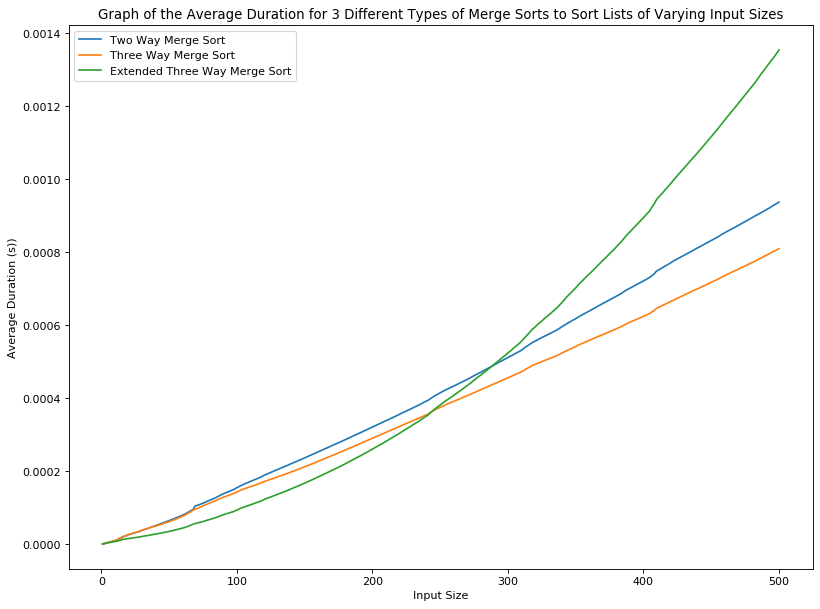

In [162]:
two_way_merge_duration = []
three_way_merge_duration = []
extended_merge_duration = []

two_way_merge_ave_duration = []
three_way_merge_ave_duration = []
extended_merge_ave_duration = []

for input_size in range(1, 501):
    for _ in range(50):
        array = random.sample(range(100000), input_size)
        start_two_way = time.time()                     
        twoWayMerge(array)                
        end_two_way = time.time()                      
        two_way_merge_duration.append(end_two_way - start_two_way)  
        
        start_three_way = time.time()                     
        threeWayMerge(array)                
        end_three_way = time.time()                      
        three_way_merge_duration.append(end_three_way - start_three_way)   
        
        start_extended = time.time()                     
        extendedThreeWayMerge(array)                
        end_extended = time.time()                      
        extended_merge_duration.append(end_extended - start_extended)    
    
    two_way_merge_ave_duration.append(np.mean(two_way_merge_duration))
    three_way_merge_ave_duration.append(np.mean(three_way_merge_duration))
    extended_merge_ave_duration.append(np.mean(extended_merge_duration))
    

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(1, 501), two_way_merge_ave_duration, label = "Two Way Merge Sort")
plt.plot(range(1, 501), three_way_merge_ave_duration, label = "Three Way Merge Sort")
plt.plot(range(1, 501), extended_merge_ave_duration, label = "Extended Three Way Merge Sort")
plt.xlabel("Input Size")
plt.ylabel("Average Duration (s))")
plt.legend()
plt.title("Graph of the Average Duration for 3 Different Types of Merge Sorts to Sort Lists of Varying Input Sizes")
plt.show()

## Measuring Number of Steps for Two-Way, Three-Way, and Extended Three-Way Merge Sort Algorithms

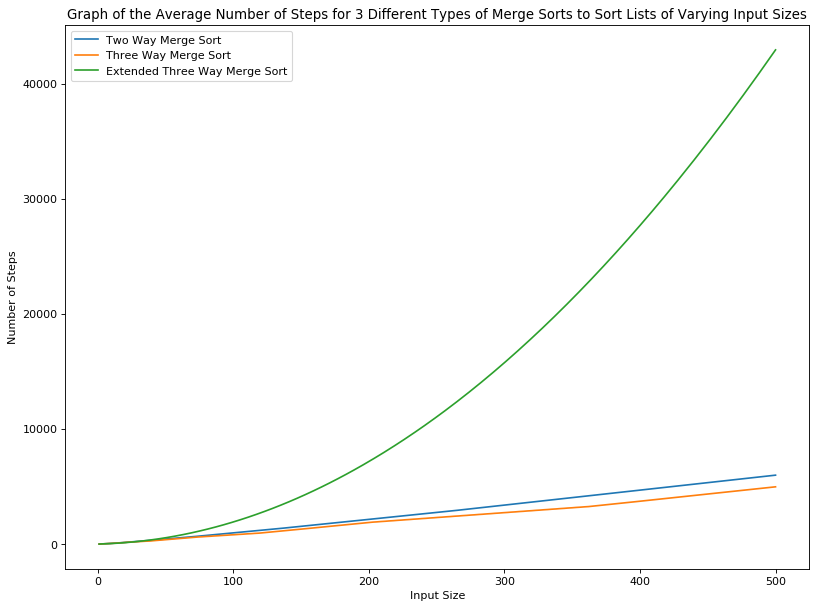

In [50]:
two_way_merge_ave_steps = []
three_way_merge_ave_steps = []
extended_merge_ave_steps = []

for input_size in range(1, 501):
    for _ in range(50):
        
        two_way_merge_steps = []
        three_way_merge_steps = []
        extended_merge_steps = []

        array = random.sample(range(100000), input_size)                    
        twoWayMerge(array)                                     
        two_way_merge_steps.append(len(c_two_way))
        c_two_way.clear()
                            
        threeWayMerge(array)                                    
        three_way_merge_steps.append(len(c_three_way))
        c_three_way.clear()
                          
        extendedThreeWayMerge(array)                                    
        extended_merge_steps.append(len(c_three_way_ex)) 
        c_three_way_ex.clear()
    
    two_way_merge_ave_steps.append(np.mean(two_way_merge_steps))
    three_way_merge_ave_steps.append(np.mean(three_way_merge_steps))
    extended_merge_ave_steps.append(np.mean(extended_merge_steps))
    

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(1, 501), two_way_merge_ave_steps, label = "Two Way Merge Sort")
plt.plot(range(1, 501), three_way_merge_ave_steps, label = "Three Way Merge Sort")
plt.plot(range(1, 501), extended_merge_ave_steps, label = "Extended Three Way Merge Sort")
plt.xlabel("Input Size")
plt.ylabel("Number of Steps")
plt.legend()
plt.title("Graph of the Average Number of Steps for 3 Different Types of Merge Sorts to Sort Lists of Varying Input Sizes")
plt.show()

### 1. Define what each algorithm's complexity is

As seen from the graph above, both the two-way and three-way merge sort algorithms have a linear time complexity $O(n)$ - meaning that as the input grows, the algorithms take proportionally longer to complete.

On the other hand, the extended three-way merge sort has a quadratic time complexity $(On^2)$, which means that its performance is directly proportional to the _squared size_ of the input data set. This means that as the number of input grows, the increase in the time taken for the algorithm to complete is the square of the increase of the input size. 

This makes sense, since the extended three-way merge sort involves the ``selectionSort()`` algorithm, which has a nested for loop - meaning that in every round that the operation is run, we are passing over the same array twice. This results in a quadratic time complexity.

### 2. Enumerate the explicit assumptions made to assess each run time of the algorithm's run time.

We assumed that the original problem size is a power of 2 to simplify our recurrence-based analysis. Each divide step then yields two subsequences of size exactly $n=2$.


### 3. Compare your benchmarks with the theoretical result we have discussed in class.

In class, we discussed the theoretical values for merge sort algorithms and insertion sort (which has the same complexity as selection sort due to their nested for loop properties). For merge sort, we determined the time complexity to be $\Theta (nlgn)$ because of their divide and conquer strategy, while the time complexity for selection sort is $\Theta (n^2)$, because it's quadratic. Here, my results supports this theoretical result, since the performance of the extended merge sort (with selection sort) is quadratic, while the performance of the merge sorts (two-way and three-way) are both linear.

## Question 7. [#ComplexityAnalysis, #ComputationalCritique] 

Analyze and compare the practical run times of regular merge sort (i.e., two-way merge sort), Bucket sort and recursive sort from (5) by producing a plot that illustrates how each running time grows with input size. Make sure to:
1. define what each algorithm's complexity is
2. enumerate the explicit assumptions made to assess each run time of the algorithm's run time.
3. and compare your benchmarks with the theoretical result we have discussed in class.


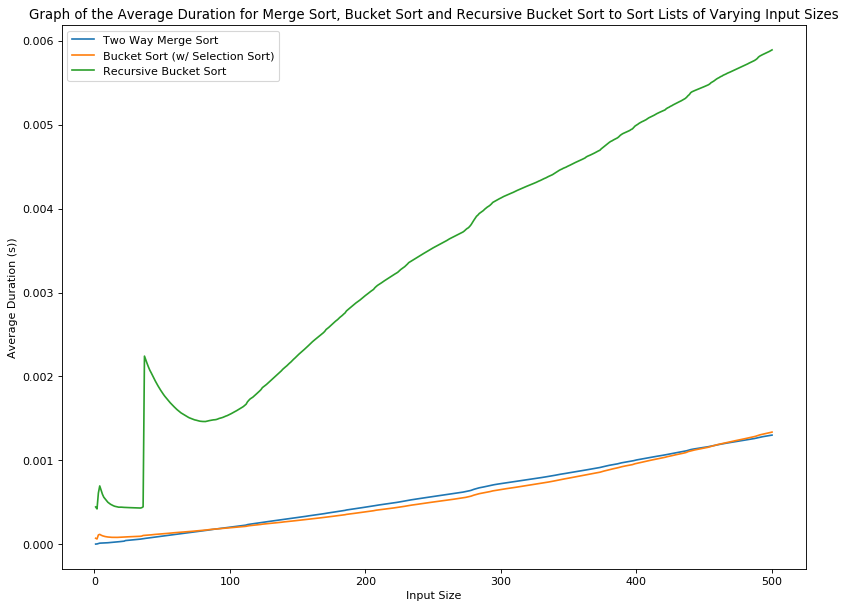

In [13]:
two_way_merge_duration = []
bucket_sort_duration = []
recursive_bucket_sort_duration = []

two_way_merge_ave_duration = []
bucket_sort_ave_duration = []
recursive_bucket_sort_ave_duration = []

for input_size in range(1, 501):
    for _ in range(50):
        array = random.sample(range(100000), input_size)
        start_two_way = time.time()                     
        twoWayMerge(array)                
        end_two_way = time.time()                      
        two_way_merge_duration.append(end_two_way - start_two_way)  
        
        start_bucket_sort = time.time()                     
        bucketSort(array, 10)                
        end_bucket_sort = time.time()                      
        bucket_sort_duration.append(end_bucket_sort - start_bucket_sort)   
        
        start_recursive_bucket_sort = time.time()                     
        extendedBucketSort(array, 10)                
        end_recursive_bucket_sort = time.time()                      
        recursive_bucket_sort_duration.append(end_recursive_bucket_sort - start_recursive_bucket_sort)    
    
    two_way_merge_ave_duration.append(np.mean(two_way_merge_duration))
    bucket_sort_ave_duration.append(np.mean(bucket_sort_duration))
    recursive_bucket_sort_ave_duration.append(np.mean(recursive_bucket_sort_duration))
    

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(1, 501), two_way_merge_ave_duration, label = "Two Way Merge Sort")
plt.plot(range(1, 501), bucket_sort_ave_duration, label = "Bucket Sort (w/ Selection Sort)")
plt.plot(range(1, 501), recursive_bucket_sort_ave_duration, label = "Recursive Bucket Sort")
plt.xlabel("Input Size")
plt.ylabel("Average Duration (s))")
plt.legend()
plt.title("Graph of the Average Duration for Merge Sort, Bucket Sort and Recursive Bucket Sort to Sort Lists of Varying Input Sizes")
plt.show()

I really don't know why recursive bucket sort takes much longer time to complete compared to the other types of algorithms despite taking much lesser number of steps (refer graph below).

## Measuring Number of Steps for Two-Way Merge Sort, Bucket Sort, and Recursive Bucket Sort Algorithms

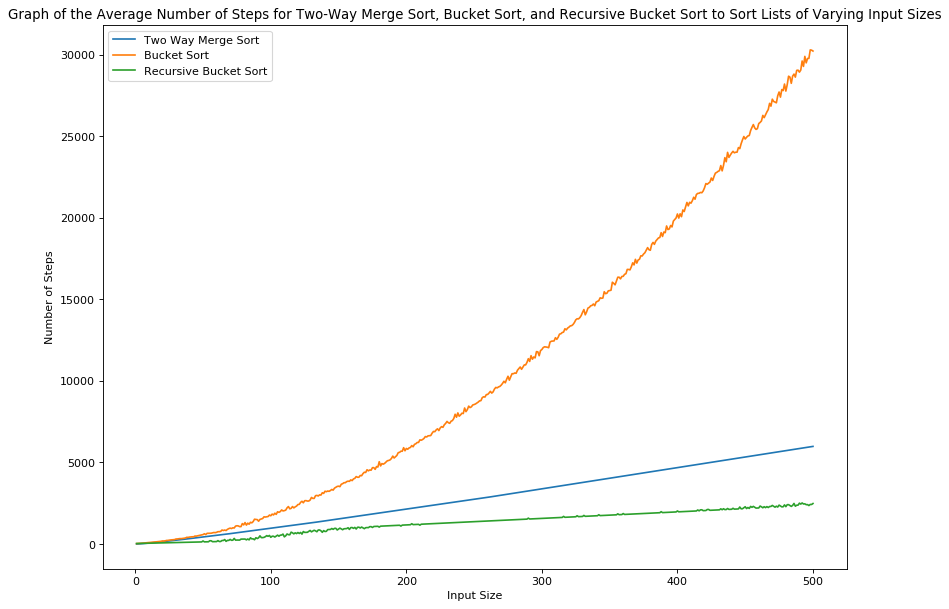

In [14]:
two_way_merge_ave_steps = []
bucket_ave_steps = []
recursive_bucket_ave_steps = []

for input_size in range(1, 501):
    for _ in range(50):
        
        two_way_merge_steps = []
        bucket_steps = []
        recursive_bucket_steps = []

        array = random.sample(range(100000), input_size)                    
        twoWayMerge(array)                                     
        two_way_merge_steps.append(len(c_two_way))
        c_two_way.clear()
                            
        bucketSort(array, 10)                                    
        bucket_steps.append(len(c_bucket))
        c_bucket.clear()
                          
        extendedBucketSort(array, 10)                                    
        recursive_bucket_steps.append(len(c_recursive_bucket)) 
        c_recursive_bucket.clear()
    
    two_way_merge_ave_steps.append(np.mean(two_way_merge_steps))
    bucket_ave_steps.append(np.mean(bucket_steps))
    recursive_bucket_ave_steps.append(np.mean(recursive_bucket_steps))
    

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(1, 501), two_way_merge_ave_steps, label = "Two Way Merge Sort")
plt.plot(range(1, 501), bucket_ave_steps, label = "Bucket Sort")
plt.plot(range(1, 501), recursive_bucket_ave_steps, label = "Recursive Bucket Sort")
plt.xlabel("Input Size")
plt.ylabel("Number of Steps")
plt.legend()
plt.title("Graph of the Average Number of Steps for Two-Way Merge Sort, Bucket Sort, and Recursive Bucket Sort to Sort Lists of Varying Input Sizes")
plt.show()

### 1. Define what each algorithm's complexity is

As aforementioned, the time complexity for two-way merge sort, is $O(n^2)$. The bucket sort algorithm, on the other hand, has a time complexity of $\Theta(n + k)$, while in the worst case scenario, its time complexity can go as bad as $O(n^2)$. This can be seen in the graph above, where the bucket sort algorithm increases at a quadratic rate with regards to the input size. 

The recursive bucket sort algorithm, however, has a different time complexity - since it introduces a recursive aspect of repeatedly breaking the list down into smaller and smaller buckets before performing selection sort on it, it is essentially using the divide-and-conquer approach, which greatly reduces/dilutes the effect of the selection sort's quadratic time complexity. This makes the time complexity for the recursive bucket sort to model a linear $\Theta(nlogn)$ complexity, which is also seen in the graphs.

### 2. Enumerate the explicit assumptions made to assess each run time of the algorithm's run time.

Similar to merge sort, we assumed that the original problem size is a power of 2 to simplify our recurrence-based analysis for the recursive bucket sort algorithm. Each divide step then yields two subsequences of size exactly $n=2$.


### 3. Compare your benchmarks with the theoretical result we have discussed in class.

In class, we discussed the theoretical value for the bucket sort algorithm to be $\Theta (n)$ for the average case running time, and $\Theta (n^2)$ for the worst case scenario. Here, my results supports this theoretical result, since the performance of the regular bucket sort is quadratic, while the performance of the recursive bucket sort is linear.

## Extra Work: Analyzing how changing the number of buckets ($k$) affects the performance of bucket sort and recursive bucket sort algorithms

When I was running the code for bucket sort and recursive bucket sort in the previous cells to check if its working, I noticed that changing the number of buckets affects the performance of bucket sort and recursive bucket sort in different ways.

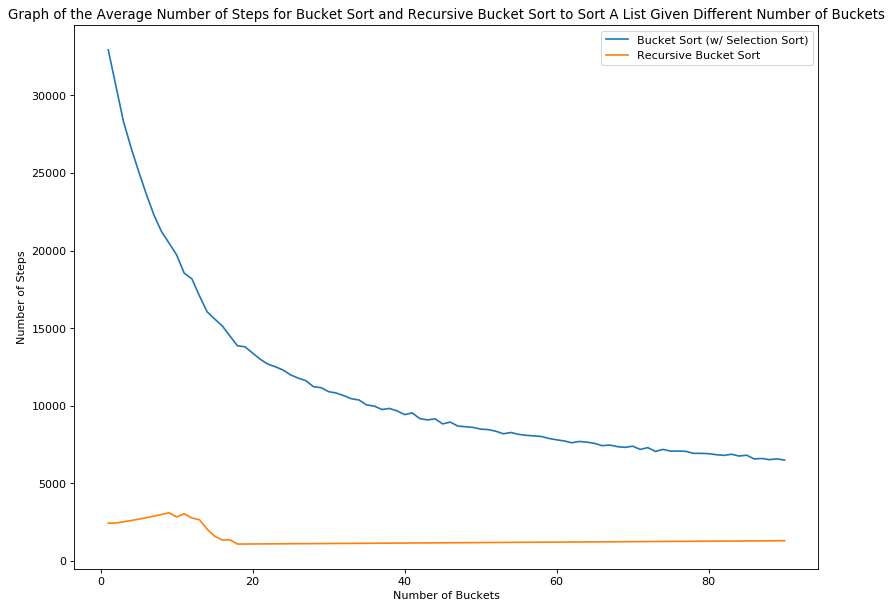

In [29]:
bucket_ave_steps = []
recursive_bucket_ave_steps = []

for bucket_size in range(10, 100):
    for _ in range(50):      
        
        bucket_steps = []
        recursive_bucket_steps = []
        
        array = random.sample(range(100000), 500)  
        
        bucketSort(array, bucket_size)                                    
        bucket_steps.append(len(c_bucket))
        c_bucket.clear()
                          
        extendedBucketSort(array, bucket_size)                                    
        recursive_bucket_steps.append(len(c_recursive_bucket)) 
        c_recursive_bucket.clear()
    
    bucket_ave_steps.append(np.mean(bucket_steps))
    recursive_bucket_ave_steps.append(np.mean(recursive_bucket_steps))
    

plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(1, 91), bucket_ave_steps, label = "Bucket Sort (w/ Selection Sort)")
plt.plot(range(1, 91), recursive_bucket_ave_steps, label = "Recursive Bucket Sort")
plt.xlabel("Number of Buckets")
plt.ylabel("Number of Steps")
plt.legend()
plt.title("Graph of the Average Number of Steps for Bucket Sort and Recursive Bucket Sort to Sort A List Given Different Number of Buckets")
plt.show()

As you can see from the graph above, the avereage number of steps bucket sort decreases gradually as the bucket sizes increase, while for the recursive bucket sort, the average number of steps remains nearly constant as bucket size increases. 

# HC Used

In this assignment, I used the following HCs:

## #algorithms
Throughout this assignment, I accurately implemented and interpreted various algorithms (merge sort, bucket sort, recursive bucket sort, etc.) using Python 3 code with detailed, clear, and efficient steps. I also provided a thorough explanation of the code with inline comments. I also did an analysis of how the number of buckets affects the performance of bucket sort and recursive bucket sort algorithms by using algorithms in a creative and effective way, relying on a novel perspective.

## #profesisonalism
In this assignment, I demonstrated a deep grasp of how to present work products in a professional manner by following nuanced conventions, such as the formatting, file types, inline comments, etc.

## #dataviz
In this assignment, I effectively generated detailed data visualizations to present the time complexity for various sorting algorithms. Moreover, I also effectively analyzed and interpreted the data visualizations that I presented and provided appropriate justification and details.

## #responsibility
I demonstrated grit, self-control, and time management/planning in the completion of this assignment, as I was able to complete it in time despite traveling 700KM south of Berlin to Munich for Oktoberfest. 

## #variables
This is a rather important one, especially for this assignment. When I was building all the different types of algorithms, there were many variables involved (positional variables like ``i, j, k``, counter variables, etc.) Therefore, it was crucial that I came up with standardized naming conventions to keep track of all of them, and add inline comments to make sure that the reader understands what's going on.